### Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Define function and parameters

In [2]:
def steady_state_capital(sigma, A0, delta, n, theta):
    return ((n + delta) / (A0 * sigma))**(1 / (theta - 1))

A0 = 1
H0 = 5
theta = 0.5
delta = 0.07
sigma = 0.5
n = 0.05

k_steady_state = steady_state_capital(sigma, A0, delta, n, theta)

### d\. calculate the steady state level of capital stock

In [3]:
print(f"Steady-State Capital per Worker (k*): {k_steady_state:.2f}")

Steady-State Capital per Worker (k*): 17.36


### e\. calculate k1

In [4]:
def next_k(k_t, sigma, A0, theta, delta, n):
    return (((1 - delta) * k_t) + (sigma * A0 * k_t**theta ) )/ (1 + n)

#assuming that k0 = k_steady_state
k0 = k_steady_state

k1 = next_k(k0, sigma, A0, theta, delta, n)
print(k1)

17.361111111111104


### f\. Calculate K0, Y0, c0

In [5]:

def calculate_K0_Y0_c0(k0, H0, A0, theta, sigma):
    K0 = k0 * H0
    Y0 = A0 * (K0**theta) * (H0**(1 - theta))
    y0 = Y0 / H0
    c0 = (1 - sigma) * y0
    return K0, Y0, c0

# Calculating for K0, Y0, and c0
K0, Y0, c0 = calculate_K0_Y0_c0(k0, H0, A0, theta, sigma)

# Output the results
print(f"Initial Aggregate Capital Stock (K0): {K0:.2f}")
print(f"Initial Aggregate Output (Y0): {Y0:.2f}")
print(f"Initial Consumption per Worker (c0): {c0:.2f}")


Initial Aggregate Capital Stock (K0): 86.81
Initial Aggregate Output (Y0): 20.83
Initial Consumption per Worker (c0): 2.08


### g\. calculate k3 and k4

In [6]:
sigma_initial = 0.5  # Initial savings rate
sigma_new = 0.1  # New savings rate introduced in period 3
k = [k0] 

def next_k(k_t, sigma):
    return (sigma * A0 * k_t**theta + (1 - delta) * k_t) / (1 + n)

for _ in range(3):
    k.append(next_k(k[-1], sigma_initial))

k.append(next_k(k[-1], sigma_new))

k1, k2, k3, k4 = k[1], k[2], k[3], k[4]

k1, k2, k3, k4

(17.361111111111104, 17.3611111111111, 17.361111111111097, 15.77380952380951)

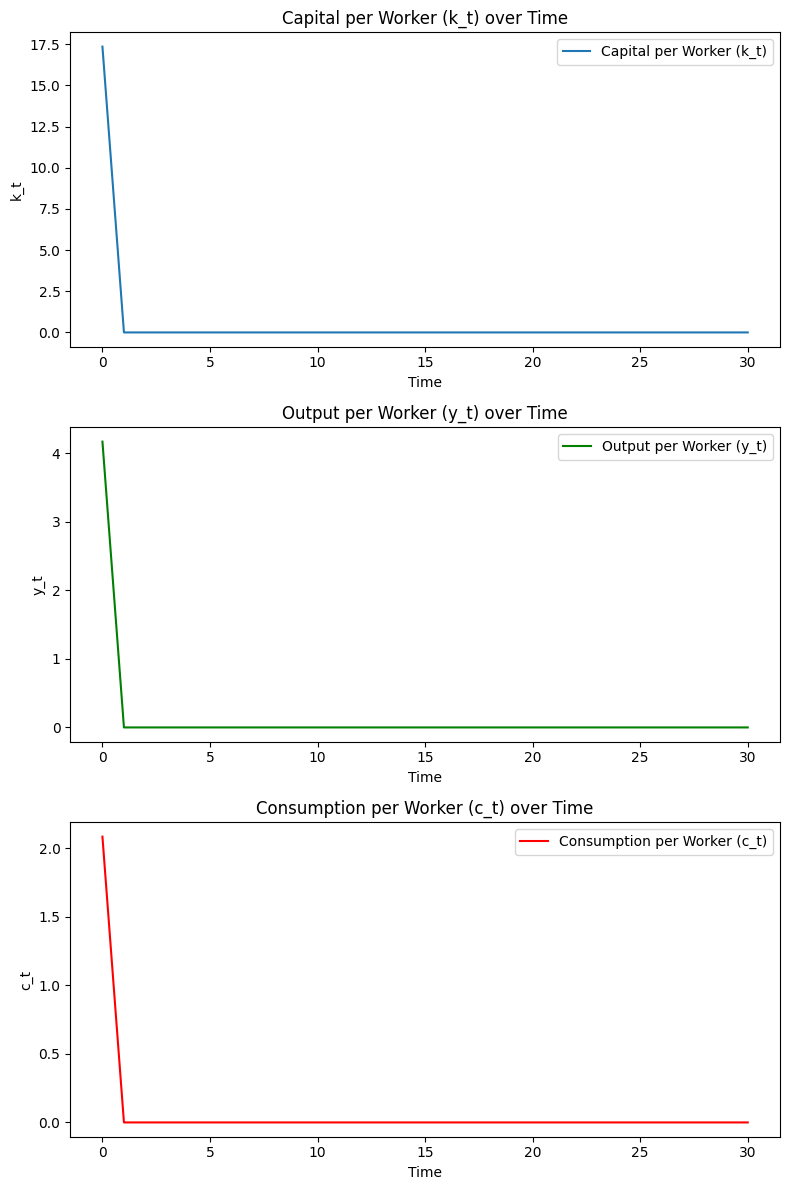

In [7]:
T = 30
k_t = np.zeros(T+1)
y_t = np.zeros(T+1)
c_t = np.zeros(T+1)

k_t[0] = k0

for t in range(T):
    y_t[t] = A0 * k_t[t]**theta
    c_t[t] = (1 - sigma) * y_t[t]
    k_t[t+1] = (((1 - delta) * k_t[T]) + (sigma * A0 * k_t[T]**theta ))/ (1 + n)


y_t[T] = A0 * k_t[T]**theta
c_t[T] = (1 - sigma) * y_t[T]

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

ax[0].plot(range(T+1), k_t, label='Capital per Worker (k_t)')
ax[0].set_title('Capital per Worker (k_t) over Time')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('k_t')
ax[0].legend()

ax[1].plot(range(T+1), y_t, label='Output per Worker (y_t)', color='green')
ax[1].set_title('Output per Worker (y_t) over Time')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('y_t')
ax[1].legend()

ax[2].plot(range(T+1), c_t, label='Consumption per Worker (c_t)', color='red')
ax[2].set_title('Consumption per Worker (c_t) over Time')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('c_t')
ax[2].legend()

plt.tight_layout()
plt.show()


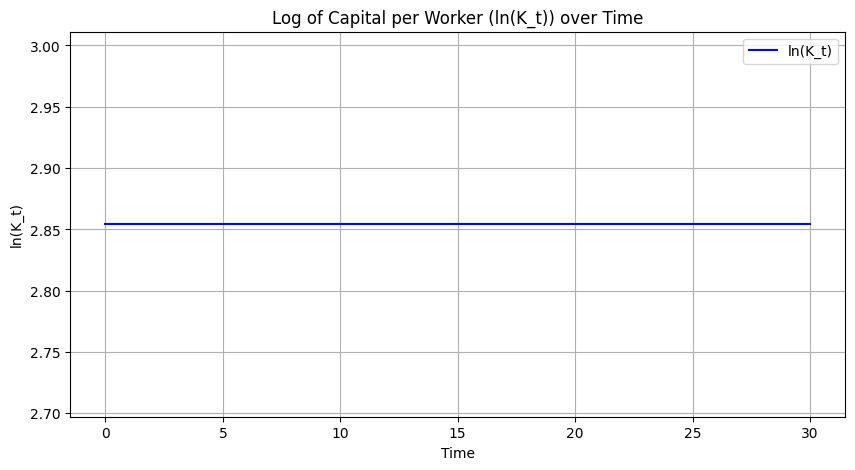

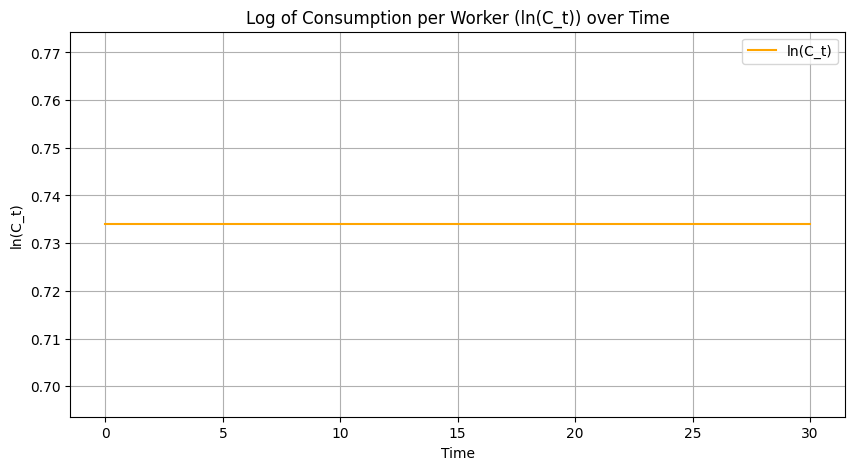

In [8]:
T = 30
k_t = np.zeros(T+1)
y_t = np.zeros(T+1)
c_t = np.zeros(T+1)
ln_K_t = np.zeros(T+1)
ln_C_t = np.zeros(T+1)

k_t[0] = k0  # Initial capital per worker

for t in range(T):
    y_t[t] = A0 * k_t[t]**theta
    c_t[t] = (1 - sigma) * y_t[t]
    k_t[t+1] = (((1 - delta) * k_t[t]) + (sigma * A0 * k_t[t]**theta ))/ (1 + n)
    ln_K_t[t] = np.log(k_t[t])
    ln_C_t[t] = np.log(c_t[t])

y_t[T] = A0 * k_t[T]**theta
c_t[T] = (1 - sigma) * y_t[T]
ln_K_t[T] = np.log(k_t[T])
ln_C_t[T] = np.log(c_t[T])

# Plotting ln(K_t)
plt.figure(figsize=(10, 5))
plt.plot(range(T+1), ln_K_t, label='ln(K_t)', color='blue')
plt.title('Log of Capital per Worker (ln(K_t)) over Time')
plt.xlabel('Time')
plt.ylabel('ln(K_t)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting ln(C_t)
plt.figure(figsize=(10, 5))
plt.plot(range(T+1), ln_C_t, label='ln(C_t)', color='orange')
plt.title('Log of Consumption per Worker (ln(C_t)) over Time')
plt.xlabel('Time')
plt.ylabel('ln(C_t)')
plt.legend()
plt.grid(True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0a664a47-d11c-4665-8bdb-2bcd5bdd7606' target="_blank">

Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>